In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import os
plt.rcParams['figure.figsize'] = [12, 5]

In [11]:
import numpy as np
import cv2
import pandas as pd
#import imutils

#original = 'frames/8.png'
#E = 'erode8.png'
def DetectAllAreas(erode_image,original):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    #cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)
    bike_area = []
    car_area = []
    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            dummy_image = np.zeros((312,981),np.uint8)
            if area <= 1500: #for bikes
                cv2.drawContours(dummy_image,c,-1,(255,0,0),thickness = 2)
                cv2.fillConvexPoly(dummy_image,c,(255,0,0)) #filling area inside the contour
                bikeAreaPixels = np.count_nonzero(dummy_image)
                bike_area.append(bikeAreaPixels)
           
            elif area > 1500: #for cars
                cv2.drawContours(dummy_image,c,-1,(255,0,0),thickness = 2)
                cv2.fillConvexPoly(dummy_image,c,(255,0,0))
                carAreaPixels = np.count_nonzero(dummy_image)
                car_area.append(carAreaPixels)
            
                
                
    return sum(car_area), sum(bike_area)

In [12]:
car_area_per_frame = []
bike_area_per_frame = []
for i in range(1,29):
    c,b = DetectAllAreas(f'erode{i}.png',f'frames/{i}.png') #getting area of bikes and cars in pixels for each frames
    car_area_per_frame.append(c)
    bike_area_per_frame.append(b)

In [13]:
for i in range(28):
    print(f"{i+1} ==> "+str(100 - (car_area_per_frame[i] + bike_area_per_frame[i]) /(312*981)*100))

1 ==> 91.09719281737631
2 ==> 82.32115319271283
3 ==> 82.11270550720093
4 ==> 78.1757233592096
5 ==> 78.3743694294153
6 ==> 80.06155414412295
7 ==> 77.40989048328498
8 ==> 85.20348153375676
9 ==> 81.77095585352467
10 ==> 78.04078778849421
11 ==> 79.57310698136386
12 ==> 78.9114979481952
13 ==> 78.30445124023106
14 ==> 85.58607125120886
15 ==> 81.29459734964323
16 ==> 83.4241616351708
17 ==> 83.42971588384432
18 ==> 73.4216132151912
19 ==> 77.55397422828615
20 ==> 79.04022582921665
21 ==> 79.55121670718
22 ==> 80.03803026738807
23 ==> 84.55232755691472
24 ==> 87.07330301366999
25 ==> 84.05440549935963
26 ==> 90.93023863666066
27 ==> 81.48311508403252
28 ==> 84.46640006273034


In [14]:
data = {'FRAME_NO':[],'Bike_Area':[],'Car_Area':[],'Ocuupied_Area':[],'Ocuupied_Area_Percentage':[]}

In [15]:
for i in range(0,28):
    data['FRAME_NO'].append(i+1)
    data['Bike_Area'].append(bike_area_per_frame[i])
    data['Car_Area'].append(car_area_per_frame[i])
    data['Ocuupied_Area'].append(bike_area_per_frame[i] + car_area_per_frame[i])
    data['Ocuupied_Area_Percentage'].append((bike_area_per_frame[i] + car_area_per_frame[i])/(312*981)*100)
    

In [18]:
Detected_Vehicles1 = pd.DataFrame(data)
Detected_Vehicles1

,FRAME_NO,Bike_Area,Car_Area,Ocuupied_Area,Ocuupied_Area_Percentage
0,1,6576,20673,27249,8.902807
1,2,7605,46505,54110,17.678847
2,3,12020,42728,54748,17.887294
3,4,12777,54021,66798,21.824277
4,5,11055,55135,66190,21.625631
5,6,14634,46392,61026,19.938446
6,7,2215,66927,69142,22.590110
7,8,7264,38024,45288,14.796518
8,9,3373,52421,55794,18.229044
9,10,9854,57357,67211,21.959212


In [19]:
Detected_Vehicles1['Total_Area'] = [(312*981) for i in range(28)]

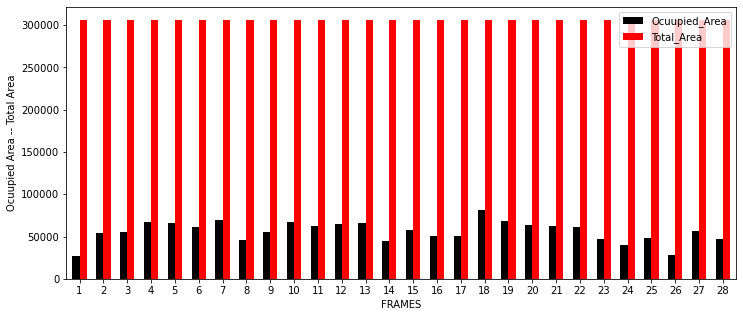

In [20]:

Detected_Vehicles1.plot(x = 'FRAME_NO', y = ['Ocuupied_Area','Total_Area'],kind = 'bar',color = ['black','red'],width = 0.6)
plt.xlabel("FRAMES")
plt.ylabel("Ocuupied Area -- Total Area")
plt.xticks(rotation = 360);

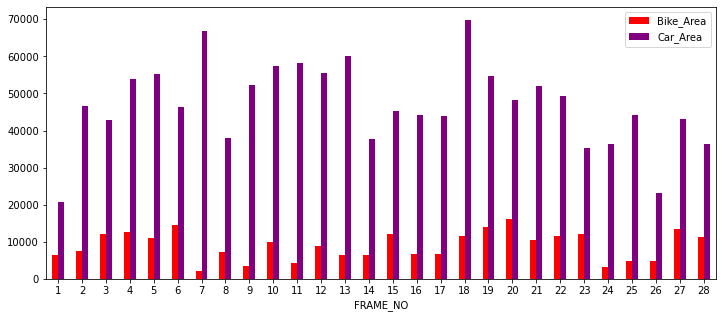

In [21]:

Detected_Vehicles1.plot(x = 'FRAME_NO', y = ['Bike_Area','Car_Area'],kind = 'bar',color = ['red','purple'])
plt.xticks(rotation = 360);

In [22]:
real_occupancy = pd.read_excel('Occupancy Data.xlsx',usecols = ['Frame No.','Vehicular Area','Percent Occupancy'])
real_occupancy

,Frame No.,Vehicular Area,Percent Occupancy
0,1,745.92,22.603636
1,2,1053.50,31.924242
2,3,992.07,30.062727
3,4,976.98,29.605455
4,5,1023.00,31.000000
5,6,1044.26,31.644242
6,7,900.97,27.302121
7,8,673.88,20.420606
8,9,632.28,19.160000
9,10,435.76,13.204848


In [23]:
real_occupancy = real_occupancy.rename(columns={'Percent Occupancy':"Real Occupancy"})

In [24]:
real_occupancy['Ocuupied_Area_Percentage'] = Detected_Vehicles1['Ocuupied_Area_Percentage']

In [25]:
real_occupancy.head(3)

,Frame No.,Vehicular Area,Real Occupancy,Ocuupied_Area_Percentage
0,1,745.92,22.603636,8.902807
1,2,1053.50,31.924242,17.678847
2,3,992.07,30.062727,17.887294


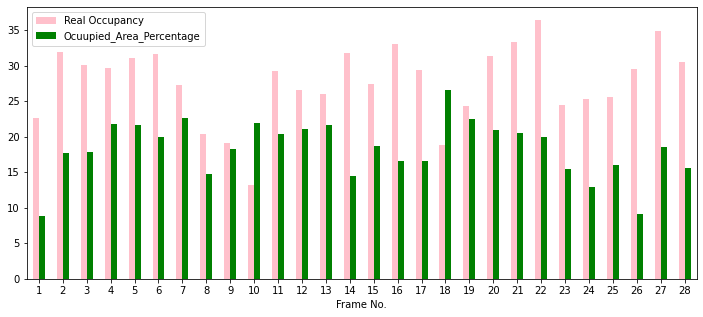

In [26]:
real_occupancy.plot(x = 'Frame No.', y = ['Real Occupancy','Ocuupied_Area_Percentage'],kind = 'bar',color = ['pink','green'])
plt.xticks(rotation = 360);

In [27]:
detect_obj = pd.read_csv("Detected_objects.csv")

In [28]:
detect_obj

,Frame_NO,BIKES_DETECTED,CARS_DETECTED
0,1,5,5
1,2,7,7
2,3,10,10
3,4,10,11
4,5,10,9
5,6,14,6
6,7,2,8
7,8,6,5
8,9,3,9
9,10,8,9


In [29]:
detect_obj['Total_vehicle'] = detect_obj['BIKES_DETECTED'] + detect_obj['CARS_DETECTED']

In [30]:
detect_obj

,Frame_NO,BIKES_DETECTED,CARS_DETECTED,Total_vehicle
0,1,5,5,10
1,2,7,7,14
2,3,10,10,20
3,4,10,11,21
4,5,10,9,19
5,6,14,6,20
6,7,2,8,10
7,8,6,5,11
8,9,3,9,12
9,10,8,9,17


In [31]:
detect_obj['Total_vehicle']/detect_obj['Total_vehicle'].sum()

0     0.023256
1     0.032558
2     0.046512
3     0.048837
4     0.044186
5     0.046512
6     0.023256
7     0.025581
8     0.027907
9     0.039535
10    0.025581
11    0.041860
12    0.030233
13    0.027907
14    0.041860
15    0.030233
16    0.034884
17    0.046512
18    0.046512
19    0.051163
20    0.044186
21    0.039535
22    0.034884
23    0.018605
24    0.025581
25    0.016279
26    0.044186
27    0.041860
Name: Total_vehicle, dtype: float64

In [32]:
detect_obj['Density'] = detect_obj['Total_vehicle']/28

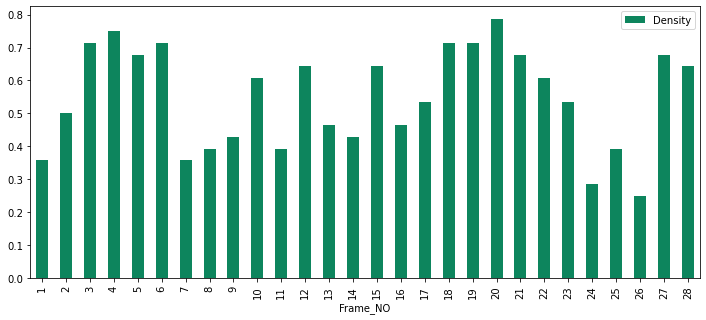

In [33]:
detect_obj.plot(x = 'Frame_NO',y = 'Density',kind = 'bar',color = '#0d855d')

In [35]:
detect_obj.to_csv("density.csv",index = False)

In [1]:
import pandas as pd
df = pd.read_csv('Detected_Vehicles1.csv')
df

,FRAME_NO,Bike_Area,Car_Area,Ocuupied_Area,Ocuupied_Area_Percentage
0,1,6576,20673,27249,8.902807
1,2,7605,46505,54110,17.678847
2,3,12020,42728,54748,17.887294
3,4,12777,54021,66798,21.824277
4,5,11055,55135,66190,21.625631
5,6,14634,46392,61026,19.938446
6,7,2215,66927,69142,22.590110
7,8,7264,38024,45288,14.796518
8,9,3373,52421,55794,18.229044
9,10,9854,57357,67211,21.959212


In [3]:
xdf = pd.DataFrame()

In [5]:
xdf['frames'] = df['FRAME_NO']

In [40]:
xdf['Bikes_area_percent'] = (df['Bike_Area'] / 918216)

In [41]:
xdf

,frames,Bikes_area_percent,Cars_area_percent
0,1,0.007162,0.758670
1,2,0.008282,0.859453
2,3,0.013091,0.780449
3,4,0.013915,0.808722
4,5,0.012040,0.832981
5,6,0.015937,0.760201
6,7,0.002412,0.967964
7,8,0.007911,0.839604
8,9,0.003673,0.939545
9,10,0.010732,0.853387


In [42]:
xdf['Cars_area_percent'] = (df['Car_Area'] / 918216)

In [43]:
xdf

,frames,Bikes_area_percent,Cars_area_percent
0,1,0.007162,0.022514
1,2,0.008282,0.050647
2,3,0.013091,0.046534
3,4,0.013915,0.058833
4,5,0.012040,0.060046
5,6,0.015937,0.050524
6,7,0.002412,0.072888
7,8,0.007911,0.041411
8,9,0.003673,0.057090
9,10,0.010732,0.062466


In [44]:
xdf.to_csv("individual_vechile_area_in_percent_image_processing.csv",index = False)

In [45]:
xxdf = pd.DataFrame()

In [46]:
xxdf['Frames'] = xdf['frames']

In [49]:
xxdf['Cars_area_percent'] = xdf['Cars_area_percent']

In [50]:
xdf.to_csv("car_area_in_percent_image_processing.csv",index = False)